<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/croacia-perdeu/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## **Todo o dataset**

In [3]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


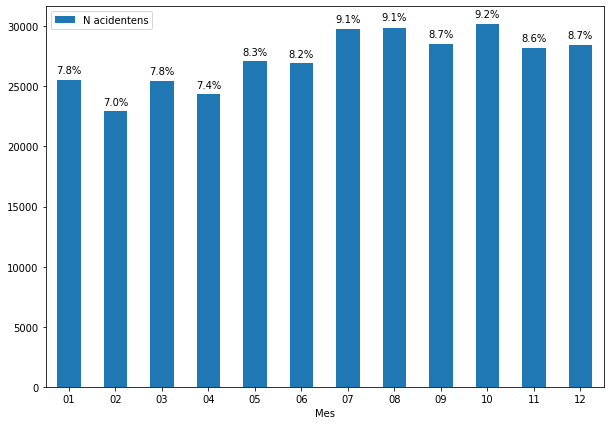

In [4]:
percentages=[]

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(data)) 
    ax.annotate(f'{round(height/len(data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')


In [5]:
new_data= pd.DataFrame(columns = data.columns)
datas=[]

for name, group in mes_groupby:
  d=group.sample(int(round(10000*percentages[int(name)-1]))) 
  new_data.append(d, ignore_index = True)
  datas.append(d)


new_data=datas[0]

for i in range(1,12):
 new_data=pd.concat([new_data,datas[i]], ignore_index = True)

In [6]:
new_data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2010443093,2010:01:28 06:45:00,01/28/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Quinta-Feira,"39,02644",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Desligada,Betuminoso,Curva,Em patamar,Sem berma ou impraticável,Em plena via,Direita
1,2015933079,2015:01:16 08:50:00,01/16/00,01/01/00,01/01/00,Guarda Nacional Republicana,90.0,90.0,Sexta-Feira,"40,264845",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
2,2011517868,2011:01:04 14:25:00,01/04/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,90.0,Terça-Feira,NaN,...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda
3,20161022900,2016:01:28 15:15:00,01/28/00,01/01/00,01/01/00,Polícia de Segurança Pública,20.0,20.0,Quinta-Feira,"38,717874",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,NÃO DEFINIDO,Direita
4,2010438594,2010:01:19 17:20:00,01/19/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Terça-Feira,"40,13251",...,Não sinalizados,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013669409,2012:12:08 02:30:00,01/08/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9996,20171213529,2016:12:19 16:00:00,01/19/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Segunda-Feira,"41,278238",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Desligada,Calçada,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
9997,2014877885,2014:12:16 23:30:00,01/16/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Terça-Feira,"38,565619",...,Inexistentes,NÃO DEFINIDO,Passagem de peões,A funcionar normalmente,Calçada,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
9998,2015911624,2014:12:27 04:30:00,01/27/00,12/01/00,01/01/00,Guarda Nacional Republicana,80.0,90.0,Sábado,"39,340717",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Na berma,Direita


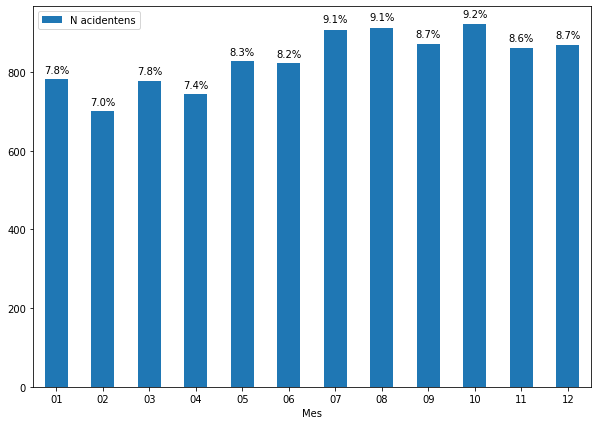

In [7]:
percentages=[]

mes_groupby=new_data.groupby(new_data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(new_data)) 
    ax.annotate(f'{round(height/len(new_data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')

In [8]:
new_data.to_csv('acidentes.csv', index=False)

### **Data Understanding**

In [9]:
acidentes_df=pd.read_csv('acidentes.csv',sep = ',')

In [10]:
acidentes_df

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2010443093,2010:01:28 06:45:00,01/28/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Quinta-Feira,"39,02644",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Desligada,Betuminoso,Curva,Em patamar,Sem berma ou impraticável,Em plena via,Direita
1,2015933079,2015:01:16 08:50:00,01/16/00,01/01/00,01/01/00,Guarda Nacional Republicana,90.0,90.0,Sexta-Feira,"40,264845",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
2,2011517868,2011:01:04 14:25:00,01/04/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,90.0,Terça-Feira,NaN,...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda
3,20161022900,2016:01:28 15:15:00,01/28/00,01/01/00,01/01/00,Polícia de Segurança Pública,20.0,20.0,Quinta-Feira,"38,717874",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,NÃO DEFINIDO,Direita
4,2010438594,2010:01:19 17:20:00,01/19/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Terça-Feira,"40,13251",...,Não sinalizados,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013669409,2012:12:08 02:30:00,01/08/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9996,20171213529,2016:12:19 16:00:00,01/19/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Segunda-Feira,"41,278238",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Desligada,Calçada,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
9997,2014877885,2014:12:16 23:30:00,01/16/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Terça-Feira,"38,565619",...,Inexistentes,NÃO DEFINIDO,Passagem de peões,A funcionar normalmente,Calçada,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
9998,2015911624,2014:12:27 04:30:00,01/27/00,12/01/00,01/01/00,Guarda Nacional Republicana,80.0,90.0,Sábado,"39,340717",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Na berma,Direita


In [11]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id. Acidente                     10000 non-null  int64  
 1   Datahora                         10000 non-null  object 
 2   Dia                              10000 non-null  object 
 3   Mês                              10000 non-null  object 
 4   Hora                             10000 non-null  object 
 5   Entidades Fiscalizadoras         10000 non-null  object 
 6   Velocidade local                 9917 non-null   float64
 7   Velocidade geral                 9994 non-null   float64
 8   Dia da Semana                    10000 non-null  object 
 9   Latitude GPS                     9005 non-null   object 
 10  Longitude GPS                    8999 non-null   object 
 11  Num. Mortos a 30 dias            10000 non-null  int64  
 12  Num. Feridos graves

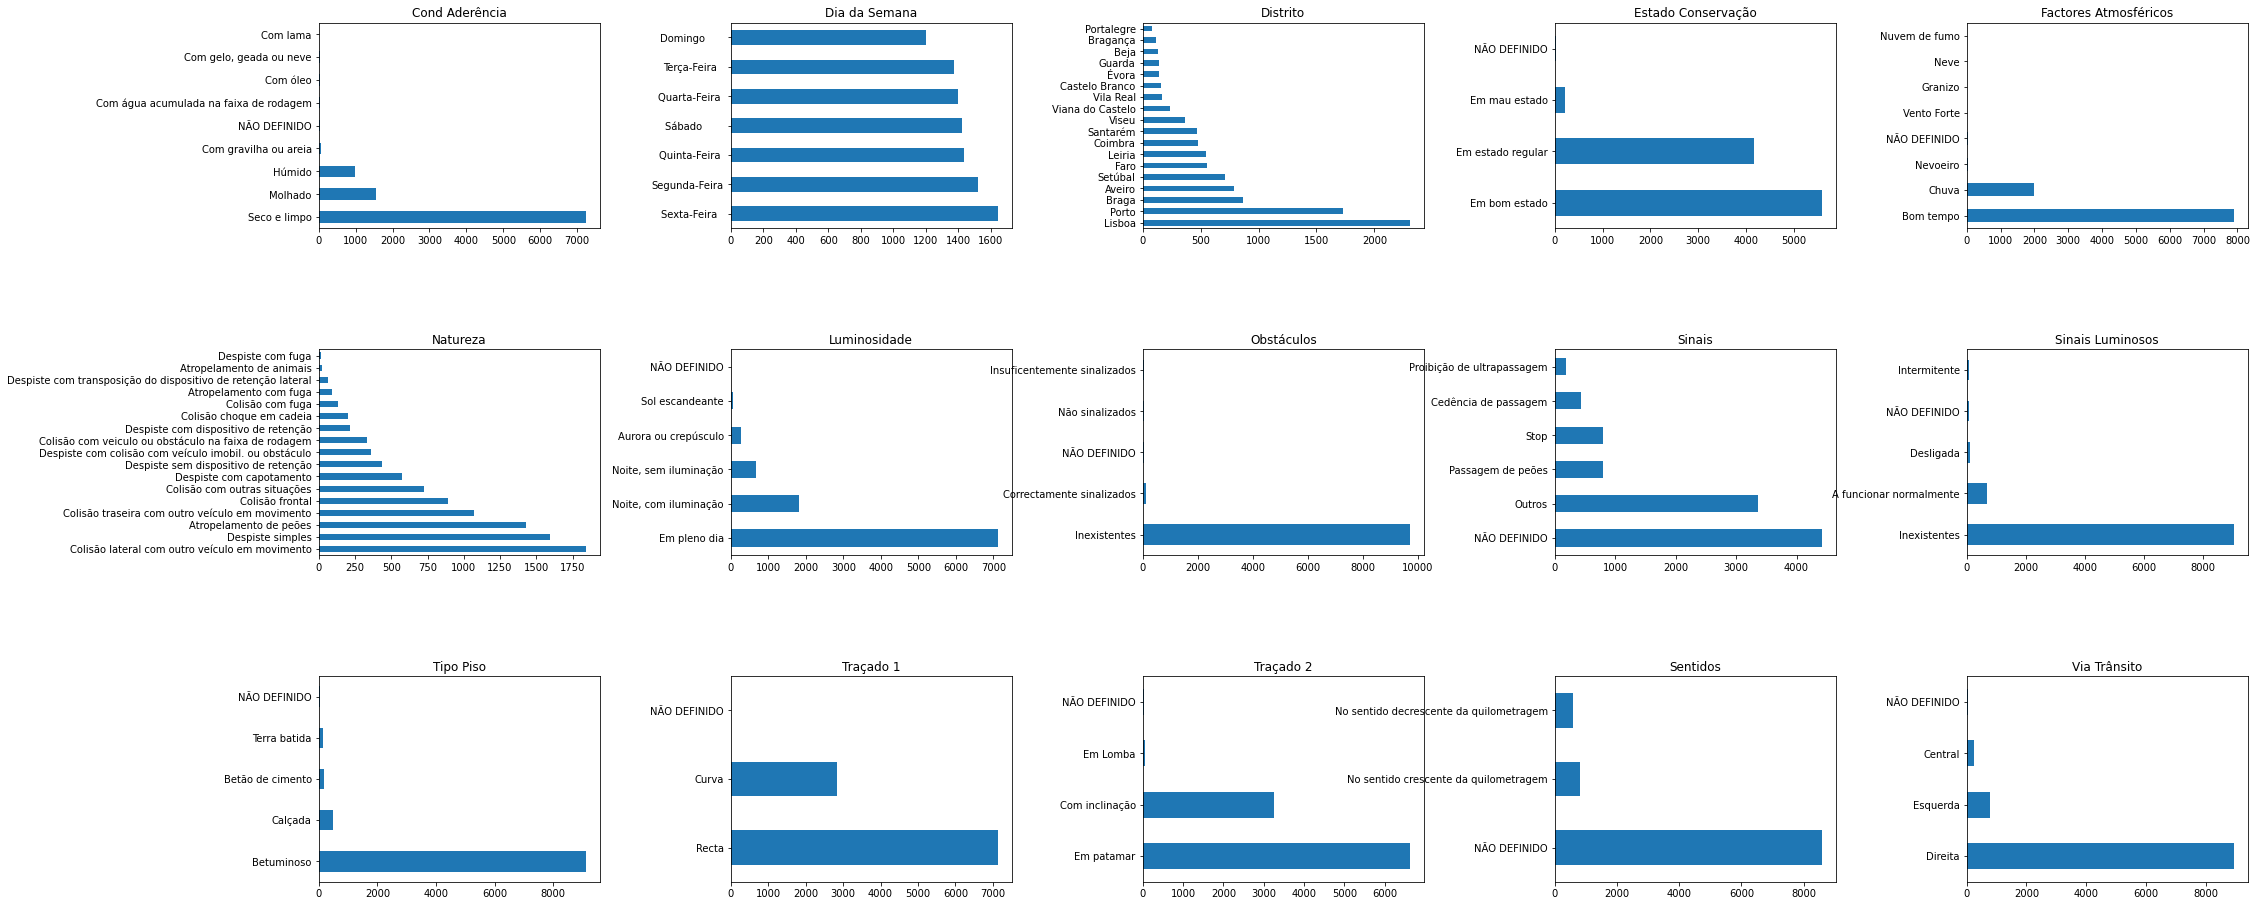

In [12]:
services = ['Cond Aderência','Dia da Semana','Distrito','Estado Conservação','Factores Atmosféricos',
            'Natureza','Luminosidade','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Sentidos','Via Trânsito']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

In [13]:
data_graves= acidentes_df[(acidentes_df['Num. Feridos ligeiros a 30 dias']>0) &(acidentes_df['Num. Feridos graves a 30 dias']==0) & (acidentes_df['Num. Mortos a 30 dias']==0)]

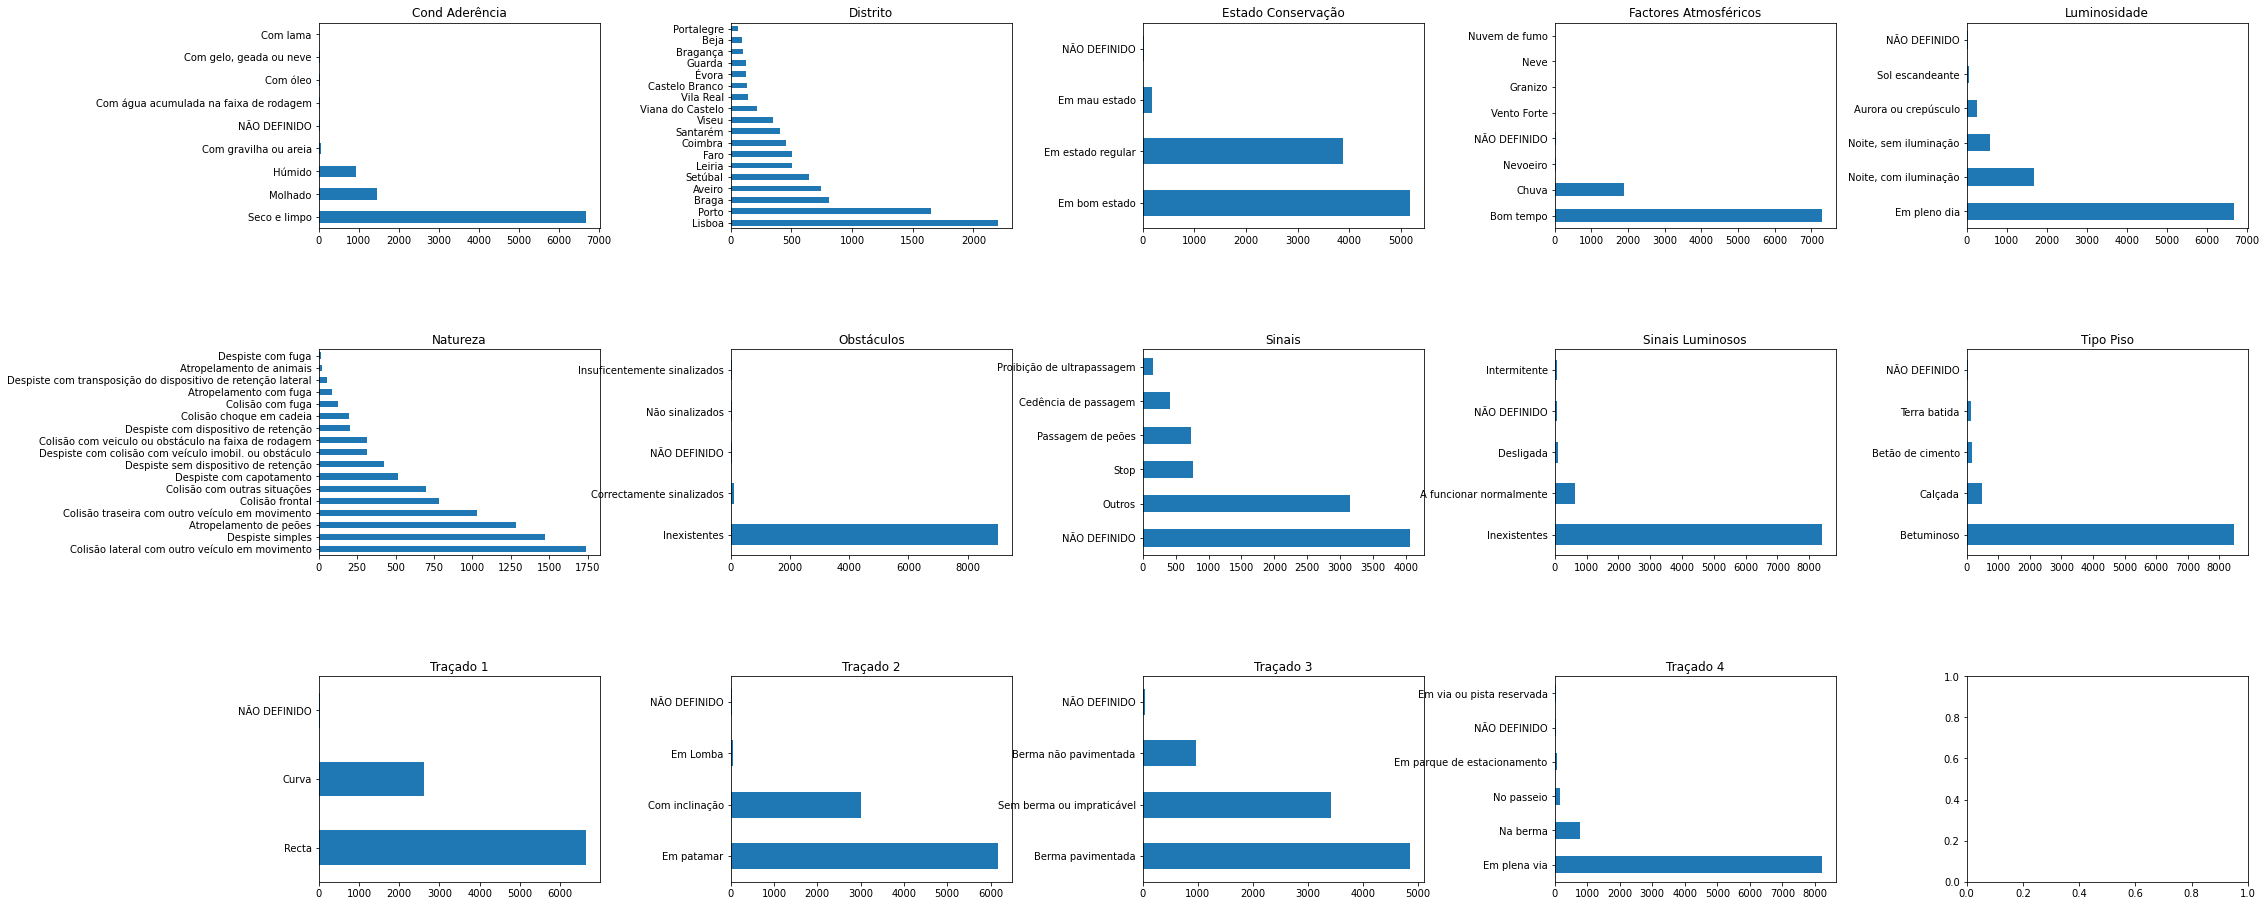

In [14]:
services = ['Cond Aderência','Distrito','Estado Conservação','Factores Atmosféricos',
            'Luminosidade','Natureza','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Traçado 3','Traçado 4']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

In [15]:
acidentes_df=acidentes_df.drop(['Id. Acidente','Dia','Hora','Mês','Entidades Fiscalizadoras','Latitude GPS','Longitude GPS','Concelho', 'Freguesia', 'Pov. Proxima','Nome arruamento','Cod Via'], axis=1)

In [16]:
data['Datahora']=data['Datahora'].str.split(' ').str[-1]

In [17]:
data=data.rename(columns={"Datahora": "Hora"})

In [20]:
acidentes_df['Datahora']=acidentes_df['Datahora'].str.split(' ').str[-1]

In [33]:
## METER A COLUNA DATAHORA PARA DATETIME
acidentes_df['Datahora'] = pd.to_datetime(acidentes_df['Datahora'])

In [57]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Datahora                         10000 non-null  datetime64[ns]
 1   Velocidade local                 9917 non-null   float64       
 2   Velocidade geral                 9994 non-null   float64       
 3   Dia da Semana                    10000 non-null  object        
 4   Num. Mortos a 30 dias            10000 non-null  int64         
 5   Num. Feridos graves a 30 dias    10000 non-null  int64         
 6   Num. Feridos ligeiros a 30 dias  10000 non-null  int64         
 7   Características Tecnicas1        10000 non-null  object        
 8   Cond Aderência                   10000 non-null  object        
 9   Distrito                         10000 non-null  object        
 10  Tipos Vias                       10000 non-null  object    

In [40]:
h1 = acidentes_df.loc[0]['Datahora']
print(h1)
h2 = pd.to_datetime('07:00:00')
if h1 > h2:
  print('a hora foi antes das 7')
else:
  print('a hora foi depois das 7')


2022-12-14 06:45:00
a hora foi depois das 7


In [72]:
slots=['06:00:00','12:00:00','18:00:00']
hours=pd.to_datetime(slots)

day_slots=[]
for index in acidentes_df.index:
  # print(acidentes_df['Datahora'][index])
  if acidentes_df['Datahora'][index] < hours[0]:
    day_slots.append('Madrugada')
  elif (acidentes_df['Datahora'][index] >= hours[0]) & (acidentes_df['Datahora'][index] < hours[1]):
    day_slots.append('Manha')
  elif  (acidentes_df['Datahora'][index] >= hours[1]) & (acidentes_df['Datahora'][index] < hours[2]):
    day_slots.append('Tarde')
  else:
    day_slots.append('Noite')

print(day_slots)
print(len(day_slots))


# mornin=data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]
# print(mornin)

# day_slots=[]
# for ind in data.index:
#   print(data['Hora'][ind])
#   if data['Hora'][ind]<hours[0]:
#     day_slots.append('Madrugada')
#   elif (data['Hora'][ind]>=hours[0]) & (data['Hora'][ind]<hours[1]):
#     day_slots.append('Manha')
#   elif  (data['Hora'][ind]>=hours[1]) & (data['Hora'][ind]<hours[2]):
#     day_slots.append('Tarde')
#   else:
#     day_slots.append('Noite')

# print(day_slots)
########################################################################################
# conditions = [
#     (data[data['Hora'] <hours[0]]),
#     (data[(data['Hora']>=hours[0]) & (data['Hora']<hours[1])]),
#     ( data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]),
#     ( data[data['Hora']>=hours[2]])
# ]
# values=['Madrugada','Manha','Tarde','Noite']

# import numpy as np

# print(np.select(conditions, values))


['Manha', 'Manha', 'Tarde', 'Tarde', 'Tarde', 'Madrugada', 'Noite', 'Noite', 'Noite', 'Manha', 'Manha', 'Tarde', 'Noite', 'Tarde', 'Tarde', 'Tarde', 'Manha', 'Tarde', 'Manha', 'Tarde', 'Manha', 'Manha', 'Manha', 'Madrugada', 'Tarde', 'Tarde', 'Tarde', 'Tarde', 'Tarde', 'Manha', 'Noite', 'Tarde', 'Noite', 'Tarde', 'Noite', 'Manha', 'Tarde', 'Tarde', 'Manha', 'Tarde', 'Manha', 'Manha', 'Madrugada', 'Manha', 'Tarde', 'Tarde', 'Tarde', 'Manha', 'Tarde', 'Tarde', 'Tarde', 'Noite', 'Manha', 'Noite', 'Tarde', 'Noite', 'Manha', 'Manha', 'Manha', 'Tarde', 'Noite', 'Manha', 'Tarde', 'Tarde', 'Tarde', 'Tarde', 'Tarde', 'Noite', 'Tarde', 'Madrugada', 'Madrugada', 'Tarde', 'Noite', 'Noite', 'Manha', 'Noite', 'Manha', 'Madrugada', 'Tarde', 'Noite', 'Tarde', 'Tarde', 'Tarde', 'Manha', 'Noite', 'Tarde', 'Tarde', 'Tarde', 'Tarde', 'Noite', 'Tarde', 'Tarde', 'Manha', 'Noite', 'Noite', 'Tarde', 'Manha', 'Noite', 'Manha', 'Noite', 'Tarde', 'Tarde', 'Madrugada', 'Tarde', 'Noite', 'Manha', 'Noite', 'Tarde',

In [ ]:
# feridos=['ligeiros', 'greves','mortes']
# n_feridos=[]
# n_feridos.append(data['Num. Feridos ligeiros a 30 dias'].sum())
# n_feridos.append(data['Num. Feridos graves a 30 dias'].sum())
# n_feridos.append(data['Num. Mortos a 30 dias'].sum())

# df = pd.DataFrame({'Feridos':feridos, 'N Feridos/Mortos':n_feridos})
# ax = df.plot.bar(x='Feridos', y='N Feridos/Mortos', rot=0)